# Excercise - Multi-class classification of MNIST using Perceptron

In binary perceptron, where $\mathbf{y} \in \{-1, +1\}$, we used to update our weights only for wrongly classified examples.

The multi-class perceptron is regarded as a generalization of binary perceptron. Learning through iteration is the same as the perceptron. Weighted inputs are passed through a multiclass signum activation function. If the predicted output label is the same as true label then weights are not updated. However, when predicted output label $\neq$ true label, then the wrongly classified input example is added to the weights of the correct label and subtracted from the weights of the incorrect label. Effectively, this amounts to ’rewarding’ the correct weight vector, ’punishing’ the misleading, incorrect weight
vector, and leaving alone an other weight vectors.

In [1]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
import math
import gif
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting the seed to ensure reproducibility of experiments
np.random.seed(11)

# One-hot encoding of target label, Y
def one_hot(a):
  b = -1 * np.ones((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

# Loading digits datasets
digits = datasets.load_digits()

# One-hot encoding of target label, Y
Y = digits.target
Y = one_hot(Y)

# Adding column of ones to absorb bias b of the hyperplane into X
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [3]:
# Train-val-test data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)

print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 432x288 with 0 Axes>

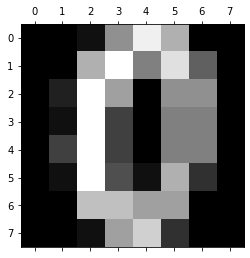

In [4]:
sns.reset_orig();
plt.gray()
plt.matshow(digits.images[10])
plt.show();

#### Write your code below

In [5]:
def signum(x):
    return 1 if x>=0 else -1

In [6]:
def Perceptron(X_train,Y_train,epochs):
    sh = X_train.shape
    dim = (sh[1],1)
    w = np.zeros(dim)
    m = 1
    len_X = len(X_train)
    while(epochs>0 and m>0):
        m = 0
        for i in range(len_X):
            xi = X_train[i]
            yi = Y_train[i]
            d_p = np.dot(np.transpose(w),xi)
            y_hat = signum(d_p[0])
            val = yi * y_hat
            if val >= 0:
                pass
            else:
                m+=1
                w = np.transpose(w) + xi*yi
                w = np.transpose(w)
        epochs -= 1
    return w,m

In [7]:
def predictclass(X_fit, Y_fit, weights):
    x_sh = X_fit.shape
    y_sh = Y_fit.shape
    predictedclass = np.zeros(x_sh[0])
    for i in range(x_sh[0]):
        for j in range(y_sh[1]):
            W = weights[:,j]
            X = X_fit[i,:]
            if np.dot(W,X) > 0:
                predictedclass[i] = j
                break
    return predictedclass
            

In [8]:
def accuracy(Y_val,predictedclass):
    sh = Y_val.shape
    error = 0
    req = 1.0
    numsamples = sh[0]
    for i in range(numsamples):
        Actualclass = Y_val[i,:]
        ind = int(predictedclass[i])
        val = Actualclass[ind]
        if val != req:
            error = error + 1
    ret = error/numsamples
    ret = 1-ret
    return ret

In [9]:
x_sh = X_train.shape
y_sh = Y_train.shape
weights = np.zeros((x_sh[1],y_sh[1]))
for i in range(y_sh[1]):
    temp = Y_train[:,i]
    T = Perceptron(X_train, temp, 99)
    w = T[0]
    err = T[1]
    temp = w[:,0]
    weights[:,i] = temp

predictedclass = predictclass(X_val,Y_val,weights)
acc = accuracy(Y_val,predictedclass)
print("Accuracy for validation set : "+str(acc*100)+"%")

predictedclass = predictclass(X_test,Y_test,weights)
acc = accuracy(Y_test,predictedclass)
print("Accuracy for testing set : "+str(acc*100)+"%")

Accuracy for validation set : 91.11111111111111%
Accuracy for testing set : 89.44444444444444%
